# Basics

## Image
An image is composed of functions such as f(x, y) where x and y represent the coordinates of a pixel and f represents its information. In gray scale, this information (f) will be a number between 0 and 256 (8 bits) for example, showing how black the pixel is. In colored images, in the other hand, tree functions are needed, one for red scale, one for green and one for blue (r(x,y),g(x,y) and b(x,y)). In OpenCV, images are numpy arrays.

## Resolution vs size
An image with a resolution of 800x1200 is a grid of 800 columns and 1200 rows, containing 800 * 1200 = 960000 pixels. Knowing that does not mean that we know the physical dimentions of the image (one pixel does not mean 1 mm for example). How large a pixel (and how large an image are, consequently) will depend on the pixels per inch (PPI). Normaly PPI is set between 200 and 400.
PPI = width(pixels) / width of image (inches) 
PPI = height(pixels) / height of imag

## Formats and compression
OpenCV supports the following formats: windows bitmap, jpeg, jpeg2000, png, portable image format and tiff files. The raw image is too big (in terms of data), so the formats will compress it. There are to main types of compression, the loss-less and the lossy. Loss-less algorithms will result in an equal image when decompressed, while the lossy, will loose some details.

## Coordinates of pixels in OpenCV
Upper-left -> (0, 0)

## Important
In  OpenCV, the the collors are in the BGR format, not rbg.

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Accessing and manipulating pixels with OpenCV

## Importing and showing images

In [11]:
# loading image
img = cv2.imread('./images/logo.png')

# getting a tuple with the shape of the image and the number of collor chanels
dimentions = img.shape
print(dimentions)
# how many elements (width * height * collor chanels)
print(img.size)
# dtype
print(img.dtype)
# showing img
cv2.imshow('original image', img)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window

(315, 600, 3)
567000
uint8


## Acessing pixel info

In [12]:
# getting all channels
(b, g, r) = img[6, 40]
print(b, g, r)
# getting only blue from (BGR)
print(img[6, 40, 0])
# modifying
img[6, 40] = (255, 255, 255)

0 0 0
0


## Regions

In [13]:
top_left_corner = img[0:50, 0:50]
# print(top_left_corner)

## Greyscale images

In [14]:
grey_img = cv2.imread('./images/logo.png', cv2.IMREAD_GRAYSCALE)
print(grey_img.shape)
print(grey_img.size)
cv2.imshow('grey image', grey_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# get pixel info
print(grey_img[6, 40])
# set it to black
grey_img[6, 40] = 0
# painting subset of the image
grey_img[0:50, 0:50] = np.full((50, 50), 255)
cv2.imshow("painted white grey image", grey_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(315, 600)
189000
0


## GBR to RBG
Some libraries, such as matplotlib, use the RGB format instead of the BGR. In the following code, conversion can be seen.

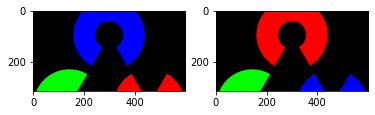

In [18]:
img_opencv = cv2.imread('./images/logo.png')

# first, we split the image into 3 arrays of channels
b, g, r = cv2.split(img_opencv)
# merging the channels in rgb
img_rgb = cv2.merge([r, g, b])

# to plot both images with pyplot, we will use subplot(m, n, p)
# for now, m(rows) = 1, n(collumns) = 2, p(where the img should go) = (0, 1)

plt.subplot(121) # fist plot, p = 1
plt.imshow(img_opencv)
plt.subplot(122) # second plot, p = 2
plt.imshow(img_rgb)
plt.show()

# same thing on cv2
img_concat = np.concatenate((img_opencv, img_rgb), axis=1)
cv2.imshow('bgr and rbg', img_concat)
cv2.waitKey(0)
cv2.destroyAllWindows()



##  Optimizing things with numpy

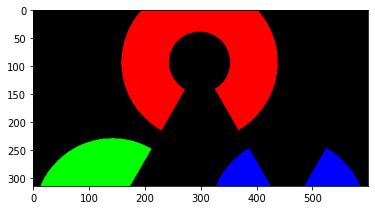

In [20]:
# channel selection
b = img_opencv[:, :, 0]
g = img_opencv[:, :, 1]
r = img_opencv[:, :, 2]
# conversion
img_rgb = img_opencv[:, :, ::-1]
plt.imshow(img_rgb)
plt.show()